# 01. Electricity Load Diagrams – Data Loading & Initial Exploration

## 1. Mục tiêu (Objective)
Notebook này thực hiện các tác vụ sau:

Nạp bộ dữ liệu Electricity Load Diagrams từ tệp CSV cục bộ (đã được tải và chuẩn hóa từ UCI).

Chuyển đổi dữ liệu thô sang định dạng chuỗi thời gian (time-series).

Kiểm tra sơ bộ cấu trúc và chất lượng dữ liệu (Missing values, Zeros).

Thăm dò trực quan nhẹ nhàng để hiểu quy luật tiêu thụ điện năng.

## 2. Thiết lập và Imports (Setup)
Sử dụng các thư viện cốt lõi đã cài đặt trong requirements.txt.

In [46]:
# Core
import numpy as np
import pandas as pd
import sys
import os

# Visualization
import matplotlib.pyplot as plt

# Thêm thư mục gốc vào path để Python tìm thấy module 'src'
sys.path.append(os.path.abspath('../'))
from src.data_loader import load_raw_data

# Cấu hình hiển thị
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Kiểm tra phiên bản Python (Yêu cầu 3.10.11 theo .python-version)
print(f"Python version: {sys.version}")

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


## 3. Nạp dữ liệu (Load Dataset) - Thông qua src data_loader.py
Thay vì sử dụng load_dataset từ Hugging Face (vốn gặp lỗi script), chúng ta nạp tệp CSV đã được tạo ra bởi scripts/download_data.py đã được cài sẵn trong file data_loader.py 

In [47]:
# Gọi hàm từ src/data_loader.py
try:
    df = load_raw_data()
    print(f"✅ Nạp dữ liệu thành công!")
    print(f"📊 Kích thước: {df.shape[0]} dòng, {df.shape[1]} khách hàng.")
except Exception as e:
    print(f"❌ Lỗi: {e}")

✅ Nạp dữ liệu thành công!
📊 Kích thước: 140256 dòng, 370 khách hàng.


In [48]:
# Kiểm tra nhanh kết quả
print(f"Kiểu dữ liệu của Index: {df.index.dtype}")
print(f"Cột đầu tiên hiện tại là: {df.columns[0]}")
df.head()

Kiểu dữ liệu của Index: datetime64[ns]
Cột đầu tiên hiện tại là: MT_001


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,...,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Kiểm tra cấu trúc dữ liệu (Data Inspection)
Chúng ta sẽ xem xét các dòng đầu tiên để xác định các cột của 370 khách hàng (MT_001 đến MT_370).

In [49]:
# Xem 5 dòng đầu tiên
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,...,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Kiểm tra kiểu dữ liệu và tổng quan bộ nhớ
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


## 5. Kiểm tra chất lượng dữ liệu (Quality Check)
Phụ tải điện thường có các giai đoạn bằng 0 nếu khách hàng chưa được lắp đặt thiết bị đo.

In [51]:
# 1. Kiểm tra giá trị thiếu (NaN)
missing = df.isnull().sum().sum()
print(f"Tổng số giá trị NaN: {missing}")

# 2. Kiểm tra các giá trị bằng 0 (Đặc trưng của bộ dữ liệu này)
zeros_count = (df == 0).sum().sum()
total_cells = df.size
print(f"Tổng số giá trị bằng 0: {zeros_count} ({zeros_count/total_cells:.2%})")

# 3. Thống kê mô tả cơ bản cho một vài cột
df.iloc[:, :5].describe()

Tổng số giá trị NaN: 0
Tổng số giá trị bằng 0: 10457342 (20.15%)


,MT_001,MT_002,MT_003,MT_004,MT_005
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309
std,5.983965,13.272415,11.014456,58.248392,26.461327
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659
50%,1.269036,24.893314,1.737619,87.398374,39.024390
75%,2.538071,29.871977,1.737619,115.853659,54.878049
max,48.223350,115.220484,151.172893,321.138211,150.000000


## 6. Thăm dò trực quan (Visual Exploration)
Vẽ biểu đồ mức tiêu thụ của một khách hàng mẫu (ví dụ MT_001) để quan sát tính chu kỳ hàng ngày.

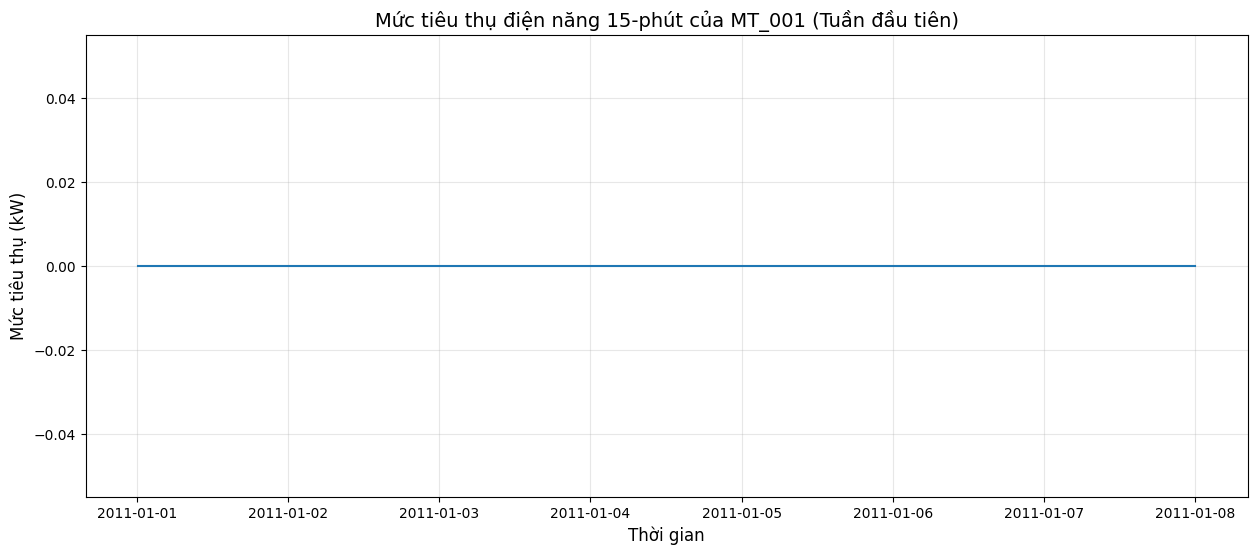

In [52]:
# Chọn khách hàng MT_001 và vẽ dữ liệu của 7 ngày đầu tiên (96 điểm/ngày * 7)
sample_client = 'MT_001'

plt.figure(figsize=(15, 6))
plt.plot(df[sample_client].head(96*7), color='tab:blue', linewidth=1.5)
plt.title(f'Mức tiêu thụ điện năng 15-phút của {sample_client} (Tuần đầu tiên)', fontsize=14)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Mức tiêu thụ (kW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 7. Kết luận sơ bộ (Conclusion)
Cấu trúc: Bộ dữ liệu bao gồm 140,256 mốc thời gian (tần suất 15 phút) cho 370 hộ tiêu thụ.

Chất lượng: Không có giá trị thiếu (NaN), nhưng có tỷ lệ giá trị bằng 0 đáng kể do các khách hàng tham gia vào các thời điểm khác nhau.

Tính chất: Biểu đồ cho thấy tính chu kỳ hàng ngày rất mạnh mẽ (Daily Seasonality).

Hướng tiếp theo: Chuyển sang notebook 02_eda.ipynb để phân tích sâu hơn về các thành phần thời vụ (ngày, tuần, năm).